In [3]:
###Various high pass filters (kernels)
import numpy as np
kernel_1 = np.array([[-1.0, -1.0, -1.0],
                       [-1.0, 8.0, -1.0],
                       [-1.0, -1.0, -1.0]])


kernel_2 = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    

kernel_3 = np.array([[0,  0,  -1, 0,  0],
                       [0,  -1, -2, -1, 0],
                       [-1, -2, 16, -2, -1],
                       [0,  -1, -2, -1, 0],
                       [0,  0,  -1, 0,  0]])

kernel_4 = np.array([[2, 1, 0],
                       [1, 0, -1],
                       [0, -1, -2]])


In [4]:
#scale2: 將 -255x16~255x16 scale 至 0~255之間, 做法: 將值除以16再加255/2
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg', 0)

highpass_image_scale2 = image.copy()
height, width = image.shape
a = 1 #neighsor_vertical_distance
b = 1 #neighsor_horizontal_distance
sum = np.zeros( (height, width), dtype=np.int32 )

kernel_1 = np.array([[-1.0, -1.0, -1.0],[-1.0, 8.0, -1.0],[-1.0, -1.0, -1.0]])
for i in range(a, height - a):
    for j in range(b, width - b):
        for ki in range(-a,a+1):
            for kj in range(-b,b+1):
                sum[i,j] = sum[i,j] + image[i+ki, j+kj]*kernel_1[ki,kj]       
        highpass_image_scale2[i, j] = int((sum[i,j]/16) + (255/2)) # 因為8-(8*(-1)=16)
        
images = [image, highpass_image_scale2]
titles = ["original", 'highpass_scale2']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<Figure size 640x480 with 2 Axes>

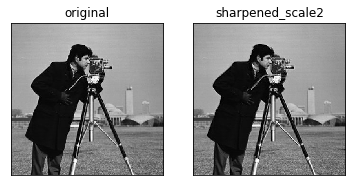

In [5]:
#sharpening_s2 using scaled highpass filtering values scale2 & clipping enhanced_image_scale2 = image.copy()

weight1 = 1.0 
sharpened_image_scale2 = np.clip(image + weight1 * (highpass_image_scale2 - 255/2), 0, 255).astype(np.uint8) 

images = [image, sharpened_image_scale2] 
titles = ['original','sharpened_scale2'] 
for i in range(2): 
    plt.subplot(1,2,i+1) 
    plt.imshow(images[i],'gray') 
    plt.title(titles[i]) 
    plt.xticks([])
    plt.yticks([]) 
plt.show()